In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/event-data?maxYear=2024&minYear=1900

In [2]:
# Path to your TSV file
file_path = '/Users/anca/Desktop/Bootcamp - Ironhack/Project - Earthquake/earthquakes-2024-08-05_14-53-37_+0200.tsv'

df = pd.read_csv(file_path, delimiter='\t')

# Save the DataFrame as a CSV file
csv_file_path = '/Users/anca/Desktop/Bootcamp - Ironhack/Project - Earthquake/earthquakes-2024-08-05_14-53-37_+0200.csv'
df.to_csv(csv_file_path, index=False)

df

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,"[""1900 <= Year >= 2024""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,9925.0,1900.0,1.0,10.0,NaN,NaN,NaN,5459.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2566.0,1900.0,1.0,11.0,9.0,7.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2567.0,1900.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0
4,NaN,2569.0,1900.0,1.0,20.0,6.0,33.0,30.0,5896.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,NaN,10736.0,2024.0,3.0,23.0,20.0,22.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,1000.0,4.0,NaN,NaN
3907,NaN,10737.0,2024.0,4.0,2.0,23.0,58.0,11.0,5919.0,NaN,...,2.0,1.0,1145.0,4.0,2.53,2.0,111.0,3.0,297.0,3.0
3908,NaN,10740.0,2024.0,6.0,18.0,9.0,54.0,49.0,NaN,NaN,...,NaN,NaN,120.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
3909,NaN,10741.0,2024.0,6.0,28.0,5.0,36.0,37.0,5921.0,NaN,...,NaN,NaN,14.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0


# Data cleaning & wrangling

#### <u>Delete the first row & the first column</u>

In [3]:
# Delete first row with index 0
df = df.drop(0)

# Delete first column
df = df.drop('Search Parameters', axis=1)
df

,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,9925.0,1900.0,1.0,10.0,NaN,NaN,NaN,5459.0,NaN,INDONESIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2566.0,1900.0,1.0,11.0,9.0,7.0,0.0,NaN,NaN,JAPAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2567.0,1900.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,INDONESIA,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0
4,2569.0,1900.0,1.0,20.0,6.0,33.0,30.0,5896.0,NaN,MEXICO,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN
5,2571.0,1900.0,5.0,16.0,20.0,12.0,0.0,5897.0,NaN,MEXICO,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,10736.0,2024.0,3.0,23.0,20.0,22.0,4.0,NaN,NaN,PAPUA NEW GUINEA,...,NaN,NaN,NaN,NaN,NaN,3.0,1000.0,4.0,NaN,NaN
3907,10737.0,2024.0,4.0,2.0,23.0,58.0,11.0,5919.0,NaN,TAIWAN,...,2.0,1.0,1145.0,4.0,2.53,2.0,111.0,3.0,297.0,3.0
3908,10740.0,2024.0,6.0,18.0,9.0,54.0,49.0,NaN,NaN,IRAN,...,NaN,NaN,120.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
3909,10741.0,2024.0,6.0,28.0,5.0,36.0,37.0,5921.0,NaN,PERU,...,NaN,NaN,14.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 1 to 3910
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  3910 non-null   float64
 1   Year                                3910 non-null   float64
 2   Mo                                  3903 non-null   float64
 3   Dy                                  3898 non-null   float64
 4   Hr                                  3724 non-null   float64
 5   Mn                                  3696 non-null   float64
 6   Sec                                 3635 non-null   float64
 7   Tsu                                 1120 non-null   float64
 8   Vol                                 33 non-null     float64
 9   Country                             3910 non-null   object 
 10  Area                                238 non-null    object 
 11  Region                              3910 no

In [5]:
df[['Country', 'Region', 'Location Name']].iloc[0:50]

,Country,Region,Location Name
1,INDONESIA,170.0,INDONESIA: GALELA (HALMAHERA ISLAND)
2,JAPAN,30.0,JAPAN: SEA OF JAPAN
3,INDONESIA,60.0,INDONESIA: JAVA: SUKABUMI
4,MEXICO,150.0,MEXICO
5,MEXICO,150.0,MEXICO: NEAR COAST OF JALISCO
6,VENEZUELA,160.0,"VENEZUELA: CASANAY (CASANAI),CARIACO"
7,COSTA RICA,100.0,COSTA RICA
8,TURKEY,140.0,"TURKEY: KARS,KARAKURT,KAGIZMAN,DIGOR"
9,SOLOMON ISLANDS,170.0,SOLOMON ISLANDS: SANTA CRUZ ISLANDS
10,USA,150.0,ALASKA: SE. ALASKA


#### <u>Analysis of "Magnitude" columns</u>

**Mag** = Earthquake Magnitude

Valid values: 0.0 to 9.9

The value in this column contains the primary earthquake magnitude. Magnitude measures the energy released at the source of the earthquake. Magnitude is determined from measurements on seismographs. For pre-instrumental events, the magnitudes are derived from intensities. There are several different scales for measuring earthquake magnitudes. The primary magnitude is chosen from the available magnitude scales in this order:

- Mw Magnitude
- Ms Magnitude
- Mb Magnitude
- Ml Magnitude
- Mfa Magnitude
- Unknown Magnitude

In [6]:
# Create boolean masks for non-null values in specified columns
mask_Mw = df['Mw'].notnull()
mask_Ms = df['Ms'].notnull()
mask_Mb = df['Mb'].notnull()
mask_Ml = df['Ml'].notnull()
mask_Mfa = df['Mfa'].notnull()
mask_Unk = df['Unk'].notnull()

# Create boolean mask for null values in the 'Mag' column
mask_Mag_null = df['Mag'].isnull()

# Combine the masks to find rows where there's a non-null value in any of the specified columns and 'Mag' is null
result = df[(
    (mask_Mw | mask_Ms | mask_Mb | mask_Ml | mask_Mfa | mask_Unk) &
    mask_Mag_null
)]

result

,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description


In [7]:
# Dorp 'Mw', 'Ms', 'Mb', 'Ml', 'Mfa', 'Unk' columns
columns_to_drop = ['Mw', 'Ms', 'Mb', 'Ml', 'Mfa', 'Unk']

df = df.drop(columns_to_drop, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 1 to 3910
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  3910 non-null   float64
 1   Year                                3910 non-null   float64
 2   Mo                                  3903 non-null   float64
 3   Dy                                  3898 non-null   float64
 4   Hr                                  3724 non-null   float64
 5   Mn                                  3696 non-null   float64
 6   Sec                                 3635 non-null   float64
 7   Tsu                                 1120 non-null   float64
 8   Vol                                 33 non-null     float64
 9   Country                             3910 non-null   object 
 10  Area                                238 non-null    object 
 11  Region                              3910 no

In [9]:
#create a new DataFrame
main_df = df[['Id', 'Year', 'Mo', 'Dy', 'Tsu', 'Country', 'Location Name', 'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag' ]]

In [10]:
main_df['Year'] = main_df['Year'].astype(int)

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/3807391843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Year'] = main_df['Year'].astype(int)


In [11]:
main_df['Mo'].unique()

array([ 1.,  5.,  6.,  7.,  8.,  9., 10., 12.,  2.,  3.,  4., 11., nan])

In [12]:
# Dictionary to map month numbers to names
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

# Create a new 'Month' column using the mapping
main_df['Month'] = main_df['Mo'].map(month_mapping)
main_df

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/3471777121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Month'] = main_df['Mo'].map(month_mapping)


,Id,Year,Mo,Dy,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Month
1,9925.0,1900,1.0,10.0,5459.0,INDONESIA,INDONESIA: GALELA (HALMAHERA ISLAND),-0.030,127.250,NaN,NaN,January
2,2566.0,1900,1.0,11.0,NaN,JAPAN,JAPAN: SEA OF JAPAN,36.500,133.500,NaN,7.8,January
3,2567.0,1900,1.0,14.0,NaN,INDONESIA,INDONESIA: JAVA: SUKABUMI,-6.840,106.960,NaN,NaN,January
4,2569.0,1900,1.0,20.0,5896.0,MEXICO,MEXICO,20.000,-105.000,10.0,7.3,January
5,2571.0,1900,5.0,16.0,5897.0,MEXICO,MEXICO: NEAR COAST OF JALISCO,20.000,-105.000,60.0,6.9,May
...,...,...,...,...,...,...,...,...,...,...,...,...
3906,10736.0,2024,3.0,23.0,NaN,PAPUA NEW GUINEA,PAPUA NEW GUINEA: EAST SEPIK,-4.139,143.159,40.0,6.9,March
3907,10737.0,2024,4.0,2.0,5919.0,TAIWAN,TAIWAN: HUA-LIEN,23.819,121.562,34.0,7.4,April
3908,10740.0,2024,6.0,18.0,NaN,IRAN,IRAN: KASHMAR,35.261,58.458,10.0,4.9,June
3909,10741.0,2024,6.0,28.0,5921.0,PERU,PERU: AREQUIPA,-15.811,-74.445,28.0,7.2,June


***<u>frequency_table, proportion_table</u>***

In [13]:
# Frequency table for 'Month'
frequency_table = main_df['Month'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table = main_df['Month'].value_counts(normalize=True)

frequency_table, proportion_table

(Month
 November     359
 January      342
 May          338
 August       335
 September    327
 March        325
 July         323
 April        322
 December     321
 February     314
 June         303
 October      294
 Name: count, dtype: int64,
 Month
 November     0.091981
 January      0.087625
 May          0.086600
 August       0.085831
 September    0.083782
 March        0.083269
 July         0.082757
 April        0.082501
 December     0.082244
 February     0.080451
 June         0.077633
 October      0.075327
 Name: proportion, dtype: float64)

***<u>Comment</u>***: The numbers of earthquake which happend in a month are relatively close. It indicate that earthquakes are fairly evenly distributed throughout the year, but with some variation. ***(there is a graph in Tableau)***

In [14]:
main_df.loc[(main_df["Country"] == 'RUSSIA')]

,Id,Year,Mo,Dy,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Month
17,2586.0,1900,12.0,25.0,NaN,RUSSIA,RUSSIA: KURIL ISLANDS,43.000,146.000,40.0,7.9,December
23,2591.0,1901,4.0,5.0,NaN,RUSSIA,RUSSIA: KURIL ISLANDS,45.000,148.000,30.0,7.5,April
46,2622.0,1902,6.0,11.0,NaN,RUSSIA,RUSSIA: SEA OF OKHOTSK,50.000,148.000,600.0,8.0,June
86,2678.0,1904,6.0,25.0,1312.0,RUSSIA,RUSSIA: OFF KAMCHATKA,52.000,159.000,30.0,8.3,June
87,2679.0,1904,6.0,25.0,1313.0,RUSSIA,RUSSIA: OFF KAMCHATKA,52.000,159.000,30.0,8.1,June
...,...,...,...,...,...,...,...,...,...,...,...,...
3363,9998.0,2013,5.0,24.0,NaN,RUSSIA,RUSSIA: SEVERO KURILSKIYE,54.892,153.221,598.0,8.3,May
3367,10007.0,2013,6.0,18.0,NaN,RUSSIA,RUSSIA: KEMEROVO,54.263,86.173,10.0,5.3,June
3585,10259.0,2017,7.0,17.0,5654.0,RUSSIA,RUSSIA: BERING ISLAND,54.443,168.857,10.0,7.7,July
3754,10487.0,2020,3.0,25.0,5746.0,RUSSIA,RUSSIA: KURIL ISLANDS,48.986,157.693,57.0,7.5,March


In [15]:
main_df[['Mag', 'Focal Depth (km)']].describe()

,Mag,Focal Depth (km)
count,3618.000000,3221.000000
mean,6.354588,40.250233
std,1.044801,70.715861
min,1.600000,0.000000
25%,5.600000,10.000000
50%,6.400000,24.000000
75%,7.200000,37.000000
max,9.500000,675.000000


***<u>Comment</u>***:
- <u>Magnitude</u>
- Standard Deviation: 1.04 suggests that most earthquakes cluster around the mean (6.35) magnitude;
- Median: 6.4, meaning half of the earthquakes have a magnitude below this value and half above. 
- <u>Focal Depth (km)</u>
- Standard Deviation:70.72 km is quite large, reflecting that earthquakes can occur at a wide range of depths, from very shallow to deep.
- Median: focal depth is 24 km indicating that half of the earthquakes occur at depths shallower than this.

The dataset shows that most earthquakes are moderate to strong in magnitude, with a significant number occurring at shallow to mid-range depths within the Earth's crust. Shallow earthquakes (less than 40 km) are particularly concerning because they tend to cause more surface damage. The wide range in focal depths, from surface-level to deep within the mantle, indicates the diverse tectonic settings in which these earthquakes occur. Understanding this distribution helps in assessing earthquake risks and preparing for potential impacts on communities.

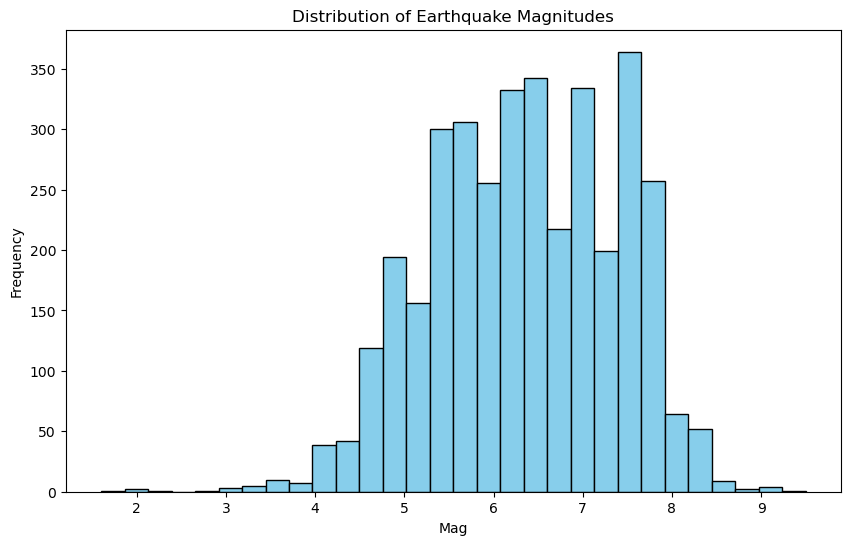

In [16]:
#Histograms
plt.figure(figsize=(10, 6))
plt.hist(main_df['Mag'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Mag')
plt.ylabel('Frequency')
plt.show()

***Histogram***
- The histogram reveals that the majority of the earthquakes are between 4,5 & 8 magnitudes. However, there's a long tail on the left side, confirming that there are more earthquakes with a small magnitudes. 

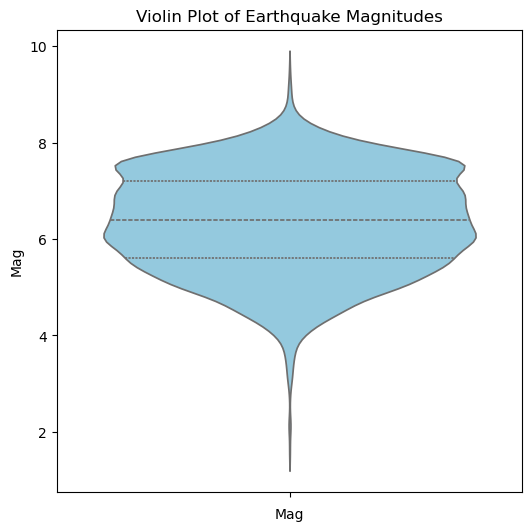

In [17]:
plt.figure(figsize=(6, 6))
sns.violinplot(y=main_df['Mag'], inner='quartile', color='skyblue')
plt.title('Violin Plot of Earthquake Magnitudes')
plt.xlabel('Mag')
plt.show()

***Violin Plot*** giving insight into the distribution and density of the magnitude data. It is useful for understanding the distribution shape.
- The violin plot will show the distribution density and highlight where the data is concentrated.

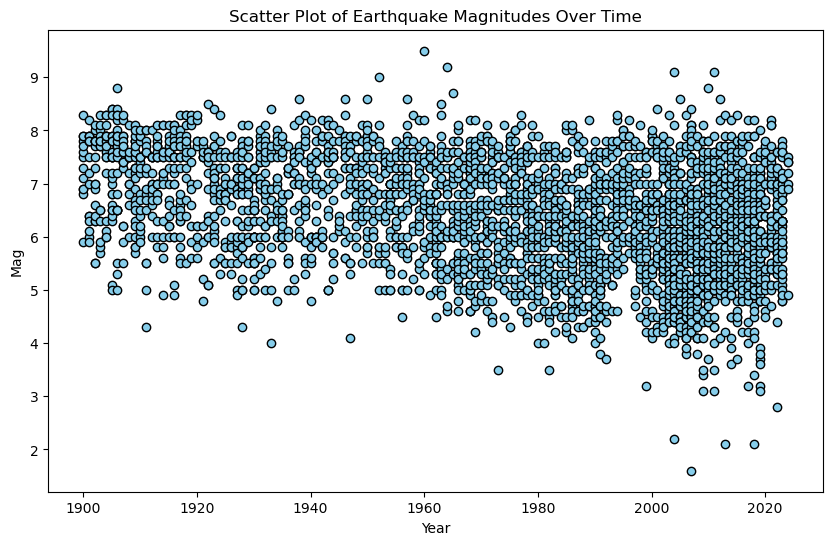

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(main_df['Year'], main_df['Mag'], color='skyblue', edgecolor='black')
plt.title('Scatter Plot of Earthquake Magnitudes Over Time')
plt.xlabel('Year')
plt.ylabel('Mag')
plt.show()

***Scatter Plot*** can be useful if you want to examine how magnitude relates to another variable over time or against another metric.
- You can plot magnitude against time or another variable to see if there's any noticeable trend or pattern.

***<u>Worldwide Map for the areas affected by earthquake</u>*** (Tableau)

***<u>Comment:</u>***
- The above graph clearly brings out the locations which have been affected by earthquake from 1900 to 2024 .

- Seems like Most of the earthquakes have been happening in the South of Europe, Asia and also along the shore line of the continents.

In [19]:
#Earthquake categorized the Magnitudes: 

main_df['Mag'].unique()

array([nan, 7.8, 7.3, 6.9, 7.5, 5.9, 7.6, 6.8, 7.1, 7.9, 8.3, 7.7, 6. ,
       6.4, 7.2, 8.2, 6.3, 7. , 6.1, 5.5, 8. , 6.6, 8.1, 5.7, 6.5, 5.8,
       8.4, 5.1, 5. , 8.8, 5.3, 6.2, 7.4, 6.7, 4.3, 4.9, 5.6, 4.8, 5.2,
       8.5, 5.4, 4. , 8.6, 4.1, 9. , 4.5, 9.5, 4.6, 9.2, 4.7, 8.7, 4.2,
       4.4, 3.5, 3.8, 3.7, 3.2, 2.2, 9.1, 3.9, 1.6, 3.4, 3.1, 2.1, 3.6,
       2.8])

In [20]:
def class_e(row):
    if pd.isna(row['Mag']):               # If Death is missing, it returns NaN.
        return np.nan
    x = row['Mag']
    if x < 2.0:                           # Based on the value of previous column, it assigns the appropriate category (0, 1, 2, 3, 4).
        return 'Micro'
    elif 2.0 <= x <= 3.9:
        return 'Minor'
    elif 4.0 <= x <= 4.9:
        return 'Light'
    elif 5.0 <= x <= 5.9:
        return 'Moderate'
    elif 6.0 <= x <= 6.9:
        return 'Strong'
    elif 7.0 <= x <= 7.9:
        return 'Major'
    elif x >= 8.0:
        return 'Great'
    return np.nan

# Apply the function to fill Houses Damaged Description
main_df['Mag_Class'] = main_df.apply(class_e, axis=1)
main_df

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/2362564225.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Mag_Class'] = main_df.apply(class_e, axis=1)


,Id,Year,Mo,Dy,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Month,Mag_Class
1,9925.0,1900,1.0,10.0,5459.0,INDONESIA,INDONESIA: GALELA (HALMAHERA ISLAND),-0.030,127.250,NaN,NaN,January,NaN
2,2566.0,1900,1.0,11.0,NaN,JAPAN,JAPAN: SEA OF JAPAN,36.500,133.500,NaN,7.8,January,Major
3,2567.0,1900,1.0,14.0,NaN,INDONESIA,INDONESIA: JAVA: SUKABUMI,-6.840,106.960,NaN,NaN,January,NaN
4,2569.0,1900,1.0,20.0,5896.0,MEXICO,MEXICO,20.000,-105.000,10.0,7.3,January,Major
5,2571.0,1900,5.0,16.0,5897.0,MEXICO,MEXICO: NEAR COAST OF JALISCO,20.000,-105.000,60.0,6.9,May,Strong
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,10736.0,2024,3.0,23.0,NaN,PAPUA NEW GUINEA,PAPUA NEW GUINEA: EAST SEPIK,-4.139,143.159,40.0,6.9,March,Strong
3907,10737.0,2024,4.0,2.0,5919.0,TAIWAN,TAIWAN: HUA-LIEN,23.819,121.562,34.0,7.4,April,Major
3908,10740.0,2024,6.0,18.0,NaN,IRAN,IRAN: KASHMAR,35.261,58.458,10.0,4.9,June,Light
3909,10741.0,2024,6.0,28.0,5921.0,PERU,PERU: AREQUIPA,-15.811,-74.445,28.0,7.2,June,Major


<u>***EDA: Correlation coefficients between 'Mag' & 'Focal Depth (km)'***</u>

In [21]:
# Calculating the Pearson correlation coefficient between 'Focal Depth (km)' and 'Mag' columns
correlation = df['Mag'].corr(df['Focal Depth (km)'])
correlation

0.27540244409226416

In [22]:
# Calculating the Spearman rank correlation between 'Focal Depth (km)' and 'Mag' columns
correlation = df['Mag'].corr(df['Focal Depth (km)'], method='spearman')
correlation

0.4048284741059091

**Pearson correlation vs Spearman correlation**

- Positive Relationship:: The **relationship is positive but weak**, suggesting that while there is a slight tendency for larger magnitudes to be associated with greater focal depths, there is a lot of variability, and other factors might be influencing the magnitude as well.

- Potential Outliers:The moderate positive correlation suggests that there is a noticeable trend where deeper earthquakes might be associated with higher magnitudes, but the relationship is not strong.

- Data Concentration:

- Pearson CC (0.275) suggests that the relationship between focal depth and magnitude is weak. This indicates that while there may be a trend, it's not strong enough to be considered a reliable predictor in a linear sense.
  
- Spearman correlation coefficient (0.405) indicates that even though the relationship might not be linear. This suggests that as one variable increases, the other tends to increase as well, though the rate of increase might not be consistent.

This scatter plot provides a visual confirmation of the strong positive relationship between these 2 variables, as indicated by the previously calculated correlation coefficients.

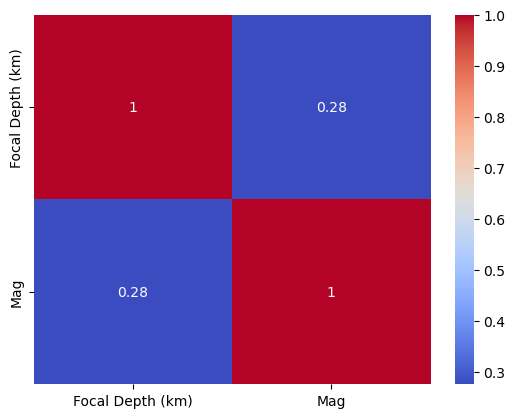

In [23]:
corr_matrix = main_df[['Focal Depth (km)', 'Mag']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
def class_d(row):
    if pd.isna(row['Focal Depth (km)']):               # If Death is missing, it returns NaN.
        return np.nan
    x = row['Focal Depth (km)']
    if x < 70.0:                           # Based on the value of previous column, it assigns the appropriate category (0, 1, 2, 3, 4).
        return 'Shallow'
    elif 70.0 <= x <= 300.0:
        return 'Intermediate'
    elif x >= 300.0:
        return 'Deep'
    return np.nan

# Apply the function to fill Houses Damaged Description
main_df['Focal Depth Class'] = main_df.apply(class_d, axis=1)
main_df

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/1766406248.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Focal Depth Class'] = main_df.apply(class_d, axis=1)


,Id,Year,Mo,Dy,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Month,Mag_Class,Focal Depth Class
1,9925.0,1900,1.0,10.0,5459.0,INDONESIA,INDONESIA: GALELA (HALMAHERA ISLAND),-0.030,127.250,NaN,NaN,January,NaN,NaN
2,2566.0,1900,1.0,11.0,NaN,JAPAN,JAPAN: SEA OF JAPAN,36.500,133.500,NaN,7.8,January,Major,NaN
3,2567.0,1900,1.0,14.0,NaN,INDONESIA,INDONESIA: JAVA: SUKABUMI,-6.840,106.960,NaN,NaN,January,NaN,NaN
4,2569.0,1900,1.0,20.0,5896.0,MEXICO,MEXICO,20.000,-105.000,10.0,7.3,January,Major,Shallow
5,2571.0,1900,5.0,16.0,5897.0,MEXICO,MEXICO: NEAR COAST OF JALISCO,20.000,-105.000,60.0,6.9,May,Strong,Shallow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,10736.0,2024,3.0,23.0,NaN,PAPUA NEW GUINEA,PAPUA NEW GUINEA: EAST SEPIK,-4.139,143.159,40.0,6.9,March,Strong,Shallow
3907,10737.0,2024,4.0,2.0,5919.0,TAIWAN,TAIWAN: HUA-LIEN,23.819,121.562,34.0,7.4,April,Major,Shallow
3908,10740.0,2024,6.0,18.0,NaN,IRAN,IRAN: KASHMAR,35.261,58.458,10.0,4.9,June,Light,Shallow
3909,10741.0,2024,6.0,28.0,5921.0,PERU,PERU: AREQUIPA,-15.811,-74.445,28.0,7.2,June,Major,Shallow


***<u>EDA: Location & Magnitude</u>***

In [25]:
# Generating a crosstab for 'Country' and 'Mag_Class'
crosstab_result = pd.crosstab(main_df['Country'], main_df['Mag_Class'])

crosstab_result

Mag_Class,Great,Light,Major,Micro,Minor,Moderate,Strong
Country,,,,,,,
AFGHANISTAN,1,3,12,0,0,17,25
ALBANIA,0,3,0,0,0,13,10
ALGERIA,0,11,1,0,0,20,6
ANTARCTICA,1,0,3,0,0,0,1
ANTIGUA AND BARBUDA,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
VENEZUELA,0,2,3,0,0,8,8
VIETNAM,0,2,0,0,0,0,3
WALLIS AND FUTUNA (FRENCH TERRITORY),0,0,0,0,0,0,1


The table showing the frequency of occurrences for combinations of two categorical variables (Country and Magnitude_class).

- **H0**: There is no association between the country and the magnitude class of earthquakes.
- **H1**: There is an association between the country and the magnitude class of earthquakes. 

In [26]:
from scipy.stats import chi2_contingency

# Chi-square test for 'Country' and 'Class_Mag'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(2642.5178794713916, 1.160130495420364e-189)

Comments: 
- P-value < 0.05
- the result reject the null hypothesis H0 in favor of the alternative hypothesis H1, concluding that there is a significant association between a country's location and the magnitude class of earthquakes it experiences.

In [27]:
from scipy.stats.contingency import association

# Computing the association between variables using the "cramer" method
association(crosstab_result, method="cramer")

0.3488984666291716

Comments: 
- While the **Chi-square test** informs us about the independence of two categorical variables, **Cramér's V** measures the strength of the association between them.

-  A Cramér's V of 0.349 suggests a moderate association between the two variables (Country and Magnitude Class of Earthquakes). This means that while there is a noticeable relationship between the country and the magnitude class of earthquakes, it is not exceptionally strong.

In [28]:
# Export the DataFrame to a CSV file
#main_df.to_csv('main_df.csv', index=False)

---

#### <u>Analysis of "Death" columns</u> (done)

- **Deaths**: Whenever possible, numbers of deaths are listed.
- **Death Description**:
  When a description was found in the historical literature instead of an actual number of deaths, this value was coded and listed in the Deaths column. If the actual number of deaths was listed, a descriptor was also added for search purposes.
    - 0	None
    - 1	Few (~1 to 50 deaths)
    - 2	Some (~51 to 100 deaths)
    - 3	Many (~101 to 1000 deaths)
    - 4	Very many (over 1000 deaths)
- **Total Deaths**: Total Number of Deaths from the Earthquake and secondary effects (eg Tsunami).
- **Total Death Description**:

In [29]:
#create a new DataFrame
death_df = df[['Id', 'Country', 'Location Name', 'Mag', 'Deaths', 'Death Description', 'Total Deaths', 'Total Death Description']]

Check & fill in the ***Total Death Description*** column: 

In [30]:
# Checking for rows where 'Deaths' has info and 'Death Description' is None or empty
death_df[(death_df['Deaths'].notna()) & (death_df['Death Description'].isna())]

,Id,Country,Location Name,Mag,Deaths,Death Description,Total Deaths,Total Death Description


In [31]:
# Checking for rows where 'Total Deaths' has info and 'Total Death Description' is None or empty
death_df[(death_df['Total Deaths'].notna()) & (death_df['Total Death Description'].isna())]

,Id,Country,Location Name,Mag,Deaths,Death Description,Total Deaths,Total Death Description
858,3605.0,PERU,"PERU: HUANCABAMBA,OXAPAMPA,EL PROGRESO,SAN DAVID",6.5,15.0,1.0,15.0,NaN
987,3774.0,TURKEY,TURKEY,7.6,2381.0,4.0,2381.0,NaN
1080,3914.0,ECUADOR,ECUADOR: TUNGURAHUA,6.5,6000.0,4.0,6000.0,NaN
1101,3940.0,PERU,PERU: CUSCO,6.0,120.0,3.0,120.0,NaN
3867,10667.0,TURKEY,TURKEY: MALATYA; SYRIA: NW,5.2,2.0,1.0,2.0,NaN


In [32]:
# Function to categorize Total Death into Description scale
def categorize(row):
    if pd.notna(row['Total Death Description']):   #If ... Description is already present, it returns that value.
        return row['Total Death Description']
        
    if pd.isna(row['Total Deaths']):               #If Death is missing, it returns NaN.
        return np.nan
    x = row['Total Deaths']
    if x == 0:                                     #Based on the value of previous column, it assigns the appropriate category (0, 1, 2, 3, 4).
        return 0
    elif 1 <= x <= 50:
        return 1
    elif 51 <= x <= 100:
        return 2
    elif 101 <= x <= 1000:
        return 3
    elif x > 1000:
        return 4
    return np.nan

# Apply the function to fill Houses Damaged Description
death_df['Total Death Description'] = death_df.apply(categorize, axis=1)

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/879904567.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_df['Total Death Description'] = death_df.apply(categorize, axis=1)


Check & fill in the ***Deaths*** & ***Total Deaths*** columns:

In [33]:
# Checking for rows where 'Deaths Description' has info and 'Death' is None or empty
death_df[(death_df['Death Description'].notna()) & (death_df['Deaths'].isna())]

,Id,Country,Location Name,Mag,Deaths,Death Description,Total Deaths,Total Death Description
4,2569.0,MEXICO,MEXICO,7.3,NaN,2.0,NaN,2.0
19,2588.0,CHINA,CHINA: YUNNAN PROVINCE,6.0,NaN,3.0,NaN,3.0
49,2626.0,PHILIPPINES,"PHILIPPINES: MINDANAO: LANAO, COTABATO",7.3,NaN,3.0,NaN,3.0
78,6239.0,CHILE,"CHILE: VALLENAR, FREIRINA",6.5,NaN,1.0,NaN,1.0
126,2743.0,TURKEY,"TURKEY: PUTURGE,CELIKHAN,RUMKALE",6.8,NaN,3.0,NaN,3.0
...,...,...,...,...,...,...,...,...
2348,5335.0,NICARAGUA,NICARAGUA: MASACHAPA; COSTA RICA,7.6,NaN,1.0,170.0,3.0
2395,5385.0,INDONESIA,INDONESIA: JAVA,7.8,NaN,1.0,238.0,3.0
2548,5536.0,TAIWAN,TAIWAN: CENTRAL,6.5,NaN,1.0,NaN,1.0
2631,5618.0,RWANDA,RWANDA: GISENYI,4.7,NaN,1.0,1001.0,2.0


In [34]:
# Checking for rows where 'Total Deaths Description' has info and 'Total Deaths' is None or empty
death_df[(death_df['Total Death Description'].notna()) & (death_df['Total Deaths'].isna())]

,Id,Country,Location Name,Mag,Deaths,Death Description,Total Deaths,Total Death Description
4,2569.0,MEXICO,MEXICO,7.3,NaN,2.0,NaN,2.0
19,2588.0,CHINA,CHINA: YUNNAN PROVINCE,6.0,NaN,3.0,NaN,3.0
27,2595.0,NEW CALEDONIA,NEW CALEDONIA: LOYALTY ISLANDS,7.9,NaN,NaN,NaN,1.0
49,2626.0,PHILIPPINES,"PHILIPPINES: MINDANAO: LANAO, COTABATO",7.3,NaN,3.0,NaN,3.0
78,6239.0,CHILE,"CHILE: VALLENAR, FREIRINA",6.5,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...
2092,5078.0,MEXICO,MEXICO: SW COAST: MEXICO CITY,7.6,NaN,2.0,NaN,2.0
2235,5222.0,PHILIPPINES,"PHILIPPINES: BOHOL, CEBU, CAGAYAN DE ORO, CAM...",6.6,NaN,2.0,NaN,2.0
2296,5280.0,AFGHANISTAN,AFGHANISTAN: BADAKHSTAN PROVINCE,5.1,NaN,2.0,NaN,2.0
2302,5289.0,GEORGIA,GEORGIA: KHEKHETI,4.9,NaN,1.0,NaN,1.0


In [35]:
# Deaths
df1 = pd.DataFrame()
for country in death_df["Country"].unique():
    for number in death_df.loc[death_df["Country"] == country]["Death Description"].unique():
        country_number_df = death_df.loc[(death_df["Country"] == country) & (death_df["Death Description"] == number)]
        country_number_df["Deaths"].fillna(country_number_df["Deaths"].mean(), inplace=True)
        df1 = pd.concat([df1, country_number_df])

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/2985560825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_number_df["Deaths"].fillna(country_number_df["Deaths"].mean(), inplace=True)


In [36]:
df2 = pd.DataFrame()
for country in death_df["Country"].unique():
    x = death_df.loc[(death_df["Country"] == country) & (death_df["Death Description"].isna())]
    df2 = pd.concat([df2, x]) 

In [37]:
# Deaths
df1_1 = pd.DataFrame()
for number in death_df["Death Description"].unique():
    #for number in death_df.loc[death_df["Country"] == country]["Death Description"].unique():
    country_number_df_1 = death_df.loc[(death_df["Death Description"] == number)]
    country_number_df_1["Deaths"].fillna(country_number_df["Deaths"].mean(), inplace=True)
    df1_1 = pd.concat([df1_1, country_number_df_1])

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/1128019772.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_number_df_1["Deaths"].fillna(country_number_df["Deaths"].mean(), inplace=True)


In [38]:
death_df = pd.concat([df1, df2]) 
death_df

,Id,Country,Location Name,Mag,Deaths,Death Description,Total Deaths,Total Death Description
212,2868.0,INDONESIA,"INDONESIA: SW SUMATRA: KERINTJI, REDJANGLEBONG",7.6,289.142857,3.0,NaN,3.0
294,2973.0,INDONESIA,INDONESIA: SANGIHE ISLAND,7.8,138.000000,3.0,138.0,3.0
319,3005.0,INDONESIA,INDONESIA: NEW GUINEA: IRIAN JAYA: JAPEN,8.1,289.142857,3.0,NaN,3.0
533,3256.0,INDONESIA,INDONESIA: JAVA: WONOSOBO,NaN,727.000000,3.0,NaN,NaN
566,7865.0,INDONESIA,INDONESIA: SUMATRA,NaN,289.142857,3.0,NaN,3.0
...,...,...,...,...,...,...,...,...
3583,10257.0,MOZAMBIQUE,MOZAMBIQUE,5.6,NaN,NaN,NaN,NaN
3682,10384.0,MOZAMBIQUE,MOZAMBIQUE; ZIMBABWE,5.6,NaN,NaN,NaN,NaN
2955,7421.0,SWITZERLAND,SWITZERLAND: BASEL,3.9,NaN,NaN,NaN,NaN
3561,10404.0,ZAMBIA,ZAMBIA: KAPUTA,5.9,NaN,NaN,NaN,NaN


In [39]:
# Total Deaths
df1 = pd.DataFrame()
for country in death_df["Country"].unique():
    for number in death_df.loc[death_df["Country"] == country]["Total Death Description"].unique():
        country_number_df = death_df.loc[(death_df["Country"] == country) & (death_df["Total Death Description"] == number)]
        country_number_df["Total Deaths"].fillna(country_number_df["Total Deaths"].mean(), inplace=True)
        df1 = pd.concat([df1, country_number_df])

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/886425414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_number_df["Total Deaths"].fillna(country_number_df["Total Deaths"].mean(), inplace=True)


In [40]:
df2 = pd.DataFrame()
for country in death_df["Country"].unique():
    x = death_df.loc[(death_df["Country"] == country) & (death_df["Total Death Description"].isna())]
    df2 = pd.concat([df2, x]) 

In [41]:
death_df = pd.concat([df1, df2]) 
death_df

,Id,Country,Location Name,Mag,Deaths,Death Description,Total Deaths,Total Death Description
212,2868.0,INDONESIA,"INDONESIA: SW SUMATRA: KERINTJI, REDJANGLEBONG",7.6,289.142857,3.0,291.619048,3.0
294,2973.0,INDONESIA,INDONESIA: SANGIHE ISLAND,7.8,138.000000,3.0,138.000000,3.0
319,3005.0,INDONESIA,INDONESIA: NEW GUINEA: IRIAN JAYA: JAPEN,8.1,289.142857,3.0,291.619048,3.0
566,7865.0,INDONESIA,INDONESIA: SUMATRA,NaN,289.142857,3.0,291.619048,3.0
975,3749.0,INDONESIA,INDONESIA: JAVA: JOGYAKARTA,8.1,213.000000,3.0,213.000000,3.0
...,...,...,...,...,...,...,...,...
3121,8379.0,SAUDI ARABIA,SAUDI ARABIA: WESTERN,4.6,NaN,NaN,NaN,NaN
3122,8380.0,SAUDI ARABIA,SAUDI ARABIA: WESTERN,5.7,NaN,NaN,NaN,NaN
2955,7421.0,SWITZERLAND,SWITZERLAND: BASEL,3.9,NaN,NaN,NaN,NaN
3561,10404.0,ZAMBIA,ZAMBIA: KAPUTA,5.9,NaN,NaN,NaN,NaN


In [42]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3910 entries, 212 to 3646
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       3910 non-null   float64
 1   Country                  3910 non-null   object 
 2   Location Name            3910 non-null   object 
 3   Mag                      3618 non-null   float64
 4   Deaths                   1631 non-null   float64
 5   Death Description        1642 non-null   float64
 6   Total Deaths             1570 non-null   float64
 7   Total Death Description  1577 non-null   float64
dtypes: float64(6), object(2)
memory usage: 274.9+ KB


In [43]:
death_df.loc[(death_df["Death Description"] == 0.0)]

,Id,Country,Location Name,Mag,Deaths,Death Description,Total Deaths,Total Death Description
2754,5747.0,IRAN,IRAN: WESTERN: MASJED-E- SOLEYMAN,5.0,NaN,0.0,NaN,NaN


In [44]:
# Replace the value at a specific row and column with NaN
death_df.loc[2754, 'Death Description'] = np.nan

In [45]:
# Frequency table for 'Death Description '
frequency_table = death_df['Death Description'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table = death_df['Death Description'].value_counts(normalize=True)

frequency_table, proportion_table

(Death Description
 1.0    1172
 3.0     222
 4.0     127
 2.0     120
 Name: count, dtype: int64,
 Death Description
 1.0    0.714199
 3.0    0.135283
 4.0    0.077392
 2.0    0.073126
 Name: proportion, dtype: float64)

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/2136714229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");


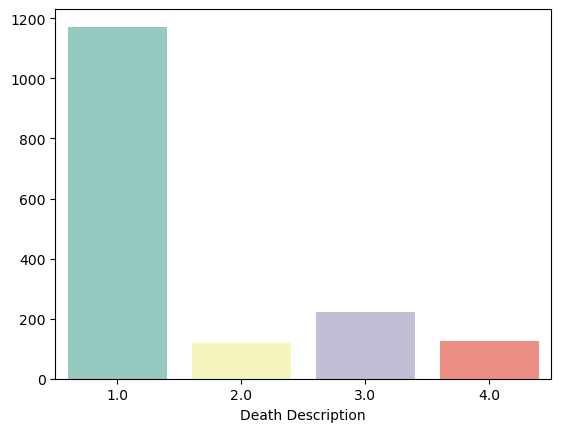

In [46]:
# Plotting a bar chart using the values from the frequency table
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

In [47]:
death_df['Deaths'].describe()

count      1631.000000
mean       1406.365715
std       12944.985419
min           1.000000
25%           2.000000
50%           9.000000
75%          71.500000
max      316000.000000
Name: Deaths, dtype: float64

***<u>Comment</u>***:
- there are 1,631 recorded instances of earthquakes in the dataset where the number of deaths is known;
- the average suggests that earthquakes have caused over 1,400 deaths. However, this high mean is likely influenced by a few very deadly earthquakes;
- the standard deviation is extremely large, indicating that the number of deaths per earthquake varies widely. This suggests that while some earthquakes cause relatively few deaths, others cause a very large number;
- The median meaning that half of the earthquakes resulted in 9 or fewer deaths.The median is a better measure of central tendency in this case than the mean, given the large standard deviation;


- Skewed Distribution: The data is highly skewed to the right (positively skewed), meaning that while most earthquakes cause relatively few deaths, there are a few catastrophic events with very high death tolls that dramatically affect the average.
- Variability: The large standard deviation indicates that the number of deaths per earthquake varies greatly, from very small numbers to massive tragedies.

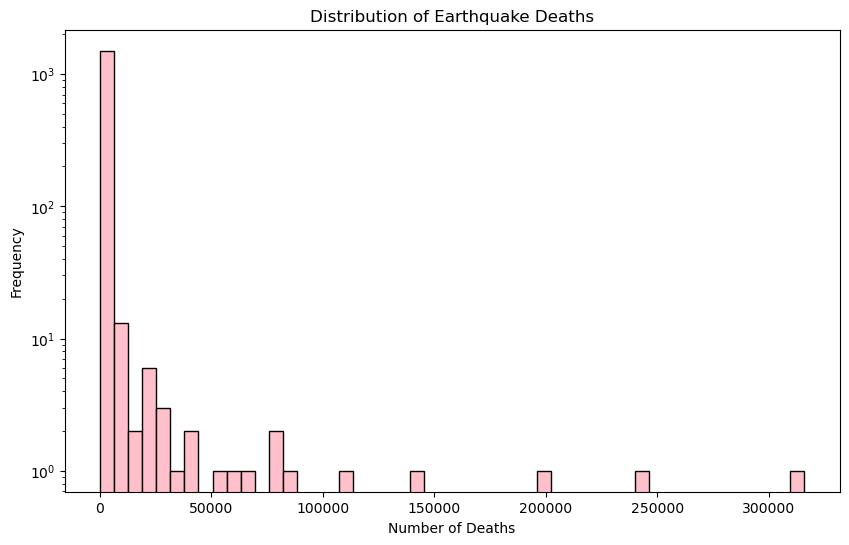

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df['Deaths'], bins=50, color='pink', edgecolor='black')
plt.title('Distribution of Earthquake Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.yscale('log')  # Optional: Log scale to handle the wide range of values
plt.show()

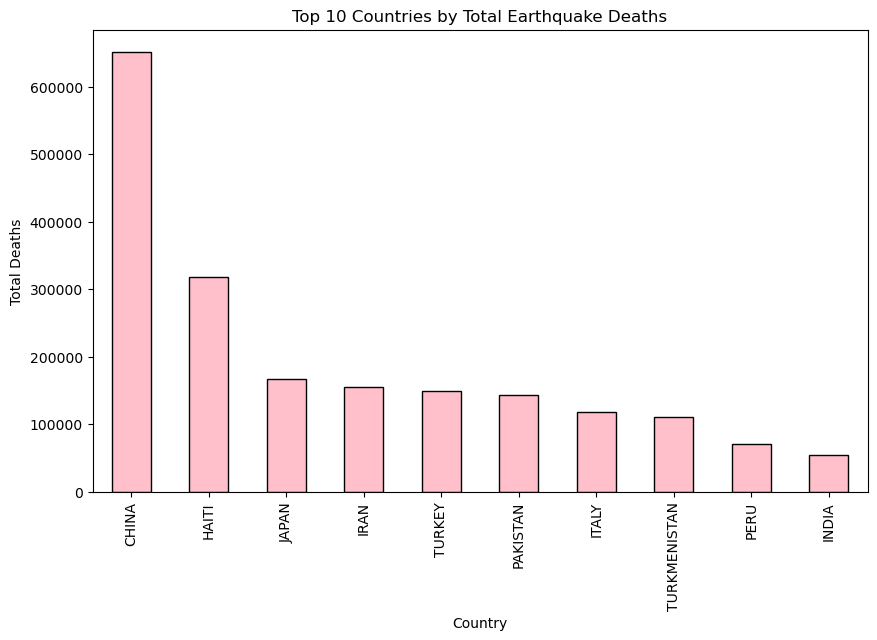

In [49]:
df_grouped = df.groupby('Country')['Deaths'].sum().sort_values(ascending=False).head(10)  # Top 10 countries
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Top 10 Countries by Total Earthquake Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.show()

In [50]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3910 entries, 212 to 3646
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       3910 non-null   float64
 1   Country                  3910 non-null   object 
 2   Location Name            3910 non-null   object 
 3   Mag                      3618 non-null   float64
 4   Deaths                   1631 non-null   float64
 5   Death Description        1641 non-null   float64
 6   Total Deaths             1570 non-null   float64
 7   Total Death Description  1577 non-null   float64
dtypes: float64(6), object(2)
memory usage: 404.0+ KB


In [51]:
death_df.dropna(subset=['Deaths'], inplace=True)

In [52]:
# Export the DataFrame to a CSV file
#death_df.to_csv('death_df.csv', index=False)

---

#### <u>Analysis of "Missing" columns</u> (done)

- **Missing**: Number of Missing from the Earthquake
- **Missing Description**
- **Total Missing**
- **Total Missing Description**

In [53]:
df['Missing'].nunique()

19

In [54]:
df['Total Missing'].nunique()

21

In [55]:
#create a new DataFrame
missing_df = df[['Id', 'Country', 'Location Name', 'Missing', 'Missing Description', 'Total Missing', 'Total Missing Description']]

In [56]:
# Checking for rows where 'Missing' has info and 'Missing Description' is None or empty
missing_df[(missing_df['Missing'].notna()) & (missing_df['Missing Description'].isna())]

,Id,Country,Location Name,Missing,Missing Description,Total Missing,Total Missing Description
3176,8995.0,CHINA,CHINA: GUIZHOU PROVINCE,1.0,NaN,1.0,1.0


In [57]:
# Checking for rows where 'Total Missing' has info and 'Total Missing Description' is None or empty
missing_df[(missing_df['Total Missing'].notna()) & (missing_df['Total Missing Description'].isna())]

,Id,Country,Location Name,Missing,Missing Description,Total Missing,Total Missing Description
2417,5404.0,COLOMBIA,"COLOMBIA: CALI, PEREIRA, ARMENIA, CALARCA",NaN,NaN,1.0,NaN


Fill in the ***Missing Description*** & ***Total Missing Description*** columns:

In [58]:
df_x = pd.DataFrame()
def categorize_inplace(df_x, x_col, description_col):
    """
    - df (pd.DataFrame): The DataFrame containing the data.
    - missing_col (str): The name of the column containing the numerical values (e.g., 'Missing').
    - description_col (str): The name of the column where the description will be placed (e.g., 'Missing Description').    """
    def categorize_row(row):
        if pd.notna(row[description_col]):   # If Description is already present, it returns that value.
            return row[description_col]
        
        if pd.isna(row[x_col]):        # If the specified column's value is missing, it returns NaN.
            return np.nan
        
        x = row[x_col]
        if x == 0:                            # Assign appropriate category based on the value of the specified column.
            return 0
        elif 1 <= x <= 50:
            return 1
        elif 51 <= x <= 100:
            return 2
        elif 101 <= x <= 1000:
            return 3
        elif x > 1000:
            return 4
        return np.nan
    
    # Apply the categorization function to each row of the DataFrame and modify the description column in place
    df_x[description_col] = df_x.apply(categorize_row, axis=1)

# Applying the function to update the same column in the dataset
categorize_inplace(missing_df, 'Missing', 'Missing Description')
categorize_inplace(missing_df, 'Total Missing', 'Total Missing Description')

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/555420145.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x[description_col] = df_x.apply(categorize_row, axis=1)


In [59]:
# Checking for rows where 'Deaths Description' has info and 'Death' is None or empty
missing_df[(missing_df['Missing Description'].notna()) & (missing_df['Missing'].isna())]

,Id,Country,Location Name,Missing,Missing Description,Total Missing,Total Missing Description
403,3111.0,USA,"CALIFORNIA: SAN JACINTO, HEMET",NaN,1.0,NaN,NaN


In [60]:
# Checking for rows where 'Total Deaths Description' has info and 'Total Deaths' is None or empty
missing_df[(missing_df['Total Missing Description'].notna()) & (missing_df['Total Missing'].isna())]

,Id,Country,Location Name,Missing,Missing Description,Total Missing,Total Missing Description
858,3605.0,PERU,"PERU: HUANCABAMBA,OXAPAMPA,EL PROGRESO,SAN DAVID",NaN,NaN,NaN,1.0
2185,5167.0,NEPAL,"NEPAL-INDIA: KATHMANDU, BIHAR",NaN,NaN,NaN,1.0
3735,10454.0,PHILIPPINES,"PHILIPPINES: MINDANAO: COTABATO, DAVAO",NaN,NaN,NaN,1.0
3736,10455.0,PHILIPPINES,"PHILIPPINES: COTABATO, SULTAN KUDARAT",NaN,NaN,NaN,1.0


Fill in the ***Missing*** & ***Total Missing columns***:

In [61]:
# Missing
df3 = pd.DataFrame()
for country in missing_df["Country"].unique():
    for number in missing_df.loc[missing_df["Country"] == country]["Missing Description"].unique():
        country_number_df = missing_df.loc[(missing_df["Country"] == country) & (missing_df["Missing Description"] == number)]
        country_number_df["Missing"].fillna(country_number_df["Missing"].mean(), inplace=True)
        df3 = pd.concat([df3, country_number_df])

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/1785878946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_number_df["Missing"].fillna(country_number_df["Missing"].mean(), inplace=True)


In [62]:
df4 = pd.DataFrame()
for country in missing_df["Country"].unique():
    x = missing_df.loc[(missing_df["Country"] == country) & (missing_df["Missing Description"].isna())]
    df4 = pd.concat([df4, x]) 

In [63]:
missing_df = pd.concat([df3, df4]) 
missing_df

,Id,Country,Location Name,Missing,Missing Description,Total Missing,Total Missing Description
3670,10369.0,INDONESIA,INDONESIA: SULAWESI,667.0,3.0,667.0,3.0
3775,10524.0,INDONESIA,"INDONESIA: SULAWESI: MAMUJU, MAJENE",3.0,1.0,3.0,1.0
3855,10654.0,INDONESIA,INDONESIA: W JAVA: CIANJUR,5.0,1.0,5.0,1.0
504,3227.0,JAPAN,"JAPAN: TOKYO, YOKOHAMA",43476.0,4.0,43476.0,4.0
1850,4788.0,JAPAN,"JAPAN: TOKKAIDO, OSHIMA",4.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...
2955,7421.0,SWITZERLAND,SWITZERLAND: BASEL,NaN,NaN,NaN,NaN
3099,8208.0,CZECH REPUBLIC,CZECH REPUBLIC: KARVINA,NaN,NaN,NaN,NaN
3554,10254.0,MADAGASCAR,MADAGASCAR: ANTSIRABE,NaN,NaN,NaN,NaN
3561,10404.0,ZAMBIA,ZAMBIA: KAPUTA,NaN,NaN,NaN,NaN


In [64]:
# Total Missing
df5 = pd.DataFrame()
for country in missing_df["Country"].unique():
    for number in missing_df.loc[missing_df["Country"] == country]["Total Missing Description"].unique():
        country_number_df = missing_df.loc[(missing_df["Country"] == country) & (missing_df["Total Missing Description"] == number)]
        country_number_df["Total Missing"].fillna(country_number_df["Total Missing"].mean(), inplace=True)
        df5 = pd.concat([df5, country_number_df])

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/2073618550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_number_df["Total Missing"].fillna(country_number_df["Total Missing"].mean(), inplace=True)


In [65]:
df6 = pd.DataFrame()
for country in missing_df["Country"].unique():
    x = missing_df.loc[(missing_df["Country"] == country) & (missing_df["Total Missing Description"].isna())]
    df6 = pd.concat([df6, x]) 

In [66]:
missing_df = pd.concat([df5, df6]) 
missing_df

,Id,Country,Location Name,Missing,Missing Description,Total Missing,Total Missing Description
3670,10369.0,INDONESIA,INDONESIA: SULAWESI,667.0,3.0,667.0,3.0
3775,10524.0,INDONESIA,"INDONESIA: SULAWESI: MAMUJU, MAJENE",3.0,1.0,3.0,1.0
3855,10654.0,INDONESIA,INDONESIA: W JAVA: CIANJUR,5.0,1.0,5.0,1.0
504,3227.0,JAPAN,"JAPAN: TOKYO, YOKOHAMA",43476.0,4.0,43476.0,4.0
3904,10727.0,JAPAN,JAPAN: HONSHU: ISHIKAWA,3.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...
2955,7421.0,SWITZERLAND,SWITZERLAND: BASEL,NaN,NaN,NaN,NaN
3099,8208.0,CZECH REPUBLIC,CZECH REPUBLIC: KARVINA,NaN,NaN,NaN,NaN
3554,10254.0,MADAGASCAR,MADAGASCAR: ANTSIRABE,NaN,NaN,NaN,NaN
3561,10404.0,ZAMBIA,ZAMBIA: KAPUTA,NaN,NaN,NaN,NaN


In [67]:
# Export the DataFrame to a CSV file
#missing_df.to_csv('missing_df.csv', index=False)

---

#### <u>Analysis of "Houses Destroy" columns</u> (done)

- Houses Destroyed: Whenever possible, numbers of houses destroyed are listed.
- Houses Destroyed Description
- Total Houses Destroyed
- Total Houses Destroyed Description

In [68]:
df['Total Houses Destroyed'].sum()

15281897.0

In [69]:
#create a new DataFrame
houses_destroy_df = df[['Id', 'Country', 'Location Name', 'Houses Destroyed', 'Houses Destroyed Description', 'Total Houses Destroyed', 'Total Houses Destroyed Description']]

Check & fill in the ***Houses Destroyed Description*** & ***Total Houses Destroyed Description*** columns:

In [70]:
# Checking for rows where 'Housese Destroy' has info and 'Housese Destroy Description' is None or empty
houses_destroy_df[(houses_destroy_df['Houses Destroyed'].notna()) & (houses_destroy_df['Houses Destroyed Description'].isna())]

,Id,Country,Location Name,Houses Destroyed,Houses Destroyed Description,Total Houses Destroyed,Total Houses Destroyed Description
2547,5535.0,TAIWAN,"TAIWAN: NANTOU, TAICHUNG, TAIZHONG",8200.0,NaN,NaN,NaN
2631,5618.0,RWANDA,RWANDA: GISENYI,307.0,NaN,307.0,3.0
3847,10645.0,MEXICO,"MEXICO: MICHOACAN, COLIMA, JALISCO",800.0,NaN,800.0,NaN


In [71]:
# Checking for rows where 'Total Housese Destroy' has info and 'Total Housese Destroy Description' is None or empty
houses_destroy_df[(houses_destroy_df['Total Houses Destroyed'].notna()) & (houses_destroy_df['Total Houses Destroyed Description'].isna())]

,Id,Country,Location Name,Houses Destroyed,Houses Destroyed Description,Total Houses Destroyed,Total Houses Destroyed Description
2800,5796.0,CHINA,CHINA: YUNNAN PROVINCE: LUDIAN,18556.0,4.0,18556.0,NaN
3847,10645.0,MEXICO,"MEXICO: MICHOACAN, COLIMA, JALISCO",800.0,NaN,800.0,NaN


In [72]:
# Applying the function to update the same column in the dataset
categorize_inplace(houses_destroy_df, 'Houses Destroyed', 'Houses Destroyed Description')
categorize_inplace(houses_destroy_df, 'Total Houses Destroyed', 'Total Houses Destroyed Description')

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/555420145.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x[description_col] = df_x.apply(categorize_row, axis=1)


Check and fill in the ***Houses Destroyed*** & ***Total Houses Destroyed columns***:

In [73]:
# Checking for rows where 'Houses Destroyed Description' has info and 'Houses Destroyed' is None or empty
houses_destroy_df[(houses_destroy_df['Houses Destroyed Description'].notna()) & (houses_destroy_df['Houses Destroyed'].isna())]

,Id,Country,Location Name,Houses Destroyed,Houses Destroyed Description,Total Houses Destroyed,Total Houses Destroyed Description
4,2569.0,MEXICO,MEXICO,NaN,3.0,NaN,3.0
16,2583.0,VENEZUELA,VENEZUELA: MACUTO,NaN,3.0,NaN,3.0
19,2588.0,CHINA,CHINA: YUNNAN PROVINCE,NaN,3.0,NaN,3.0
38,8773.0,GUATEMALA,"GUATEMALA: SAN MARTIN, QUEZALTENANGO",NaN,1.0,NaN,1.0
49,2626.0,PHILIPPINES,"PHILIPPINES: MINDANAO: LANAO, COTABATO",NaN,3.0,NaN,3.0
...,...,...,...,...,...,...,...
3836,10631.0,CHINA,CHINA: SICHUAN PROVINCE,NaN,3.0,NaN,3.0
3850,10649.0,IRAN,IRAN: KHOY; WEST AZERBAIJAN,NaN,2.0,NaN,2.0
3856,10655.0,SOLOMON ISLANDS,SOLOMON ISLANDS: HONIARA,NaN,1.0,NaN,1.0
3861,10659.0,NEPAL,INDIA: UTTAR PRADESH; NEPAL: SUDURPASHCHIM PRO...,NaN,1.0,NaN,1.0


In [74]:
# Checking for rows where 'Total Houses Destroyed Description' has info and 'Total Houses Destroyed' is None or empty
houses_destroy_df[(houses_destroy_df['Total Houses Destroyed Description'].notna()) & (houses_destroy_df['Total Houses Destroyed'].isna())]

,Id,Country,Location Name,Houses Destroyed,Houses Destroyed Description,Total Houses Destroyed,Total Houses Destroyed Description
4,2569.0,MEXICO,MEXICO,NaN,3.0,NaN,3.0
16,2583.0,VENEZUELA,VENEZUELA: MACUTO,NaN,3.0,NaN,3.0
19,2588.0,CHINA,CHINA: YUNNAN PROVINCE,NaN,3.0,NaN,3.0
38,8773.0,GUATEMALA,"GUATEMALA: SAN MARTIN, QUEZALTENANGO",NaN,1.0,NaN,1.0
49,2626.0,PHILIPPINES,"PHILIPPINES: MINDANAO: LANAO, COTABATO",NaN,3.0,NaN,3.0
...,...,...,...,...,...,...,...
3836,10631.0,CHINA,CHINA: SICHUAN PROVINCE,NaN,3.0,NaN,3.0
3850,10649.0,IRAN,IRAN: KHOY; WEST AZERBAIJAN,NaN,2.0,NaN,2.0
3856,10655.0,SOLOMON ISLANDS,SOLOMON ISLANDS: HONIARA,NaN,1.0,NaN,1.0
3861,10659.0,NEPAL,INDIA: UTTAR PRADESH; NEPAL: SUDURPASHCHIM PRO...,NaN,1.0,NaN,1.0


In [75]:
# Missing
df7 = pd.DataFrame()
for country in houses_destroy_df["Country"].unique():
    for number in houses_destroy_df.loc[houses_destroy_df["Country"] == country]["Houses Destroyed Description"].unique():
        country_number_df = houses_destroy_df.loc[(houses_destroy_df["Country"] == country) & (houses_destroy_df["Houses Destroyed Description"] == number)]
        country_number_df["Houses Destroyed"].fillna(country_number_df["Houses Destroyed"].mean(), inplace=True)
        df7 = pd.concat([df7, country_number_df])

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/588167845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_number_df["Houses Destroyed"].fillna(country_number_df["Houses Destroyed"].mean(), inplace=True)


In [76]:
df8 = pd.DataFrame()
for country in houses_destroy_df["Country"].unique():
    y = houses_destroy_df.loc[(houses_destroy_df["Country"] == country) & (houses_destroy_df["Houses Destroyed Description"].isna())]
    df8 = pd.concat([df8, y]) 

In [77]:
houses_destroy_df = pd.concat([df7, df8]) 
houses_destroy_df

,Id,Country,Location Name,Houses Destroyed,Houses Destroyed Description,Total Houses Destroyed,Total Houses Destroyed Description
162,2800.0,INDONESIA,"INDONESIA: NW SUMATRA: GUNUNGSITOLi, BARUS",675.222222,3.0,NaN,3.0
174,2814.0,INDONESIA,"INDONESIA: SULAWESI: LEMO, COLO, ANJA, OLU C...",213.000000,3.0,213.0,3.0
212,2868.0,INDONESIA,"INDONESIA: SW SUMATRA: KERINTJI, REDJANGLEBONG",675.222222,3.0,NaN,3.0
294,2973.0,INDONESIA,INDONESIA: SANGIHE ISLAND,675.222222,3.0,NaN,3.0
319,3005.0,INDONESIA,INDONESIA: NEW GUINEA: IRIAN JAYA: JAPEN,675.222222,3.0,NaN,3.0
...,...,...,...,...,...,...,...
3831,10612.0,POLAND,POLAND: SILESIAN: JASTRZEBIE-ZDROJ,NaN,NaN,NaN,NaN
2955,7421.0,SWITZERLAND,SWITZERLAND: BASEL,NaN,NaN,NaN,NaN
3099,8208.0,CZECH REPUBLIC,CZECH REPUBLIC: KARVINA,NaN,NaN,NaN,NaN
3554,10254.0,MADAGASCAR,MADAGASCAR: ANTSIRABE,NaN,NaN,NaN,NaN


In [78]:
# Total Missing
df9 = pd.DataFrame()
for country in houses_destroy_df["Country"].unique():
    for number in houses_destroy_df.loc[houses_destroy_df["Country"] == country]["Total Houses Destroyed Description"].unique():
        country_number_df = houses_destroy_df.loc[(houses_destroy_df["Country"] == country) & (houses_destroy_df["Total Houses Destroyed Description"] == number)]
        country_number_df["Total Houses Destroyed"].fillna(country_number_df["Total Houses Destroyed"].mean(), inplace=True)
        df9 = pd.concat([df9, country_number_df])

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/1897625920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_number_df["Total Houses Destroyed"].fillna(country_number_df["Total Houses Destroyed"].mean(), inplace=True)


In [79]:
df10 = pd.DataFrame()
for country in houses_destroy_df["Country"].unique():
    y = houses_destroy_df.loc[(houses_destroy_df["Country"] == country) & (houses_destroy_df["Total Houses Destroyed Description"].isna())]
    df10 = pd.concat([df10, y]) 

In [80]:
houses_destroy_df = pd.concat([df9, df10]) 
houses_destroy_df

,Id,Country,Location Name,Houses Destroyed,Houses Destroyed Description,Total Houses Destroyed,Total Houses Destroyed Description
162,2800.0,INDONESIA,"INDONESIA: NW SUMATRA: GUNUNGSITOLi, BARUS",675.222222,3.0,502.892857,3.0
174,2814.0,INDONESIA,"INDONESIA: SULAWESI: LEMO, COLO, ANJA, OLU C...",213.000000,3.0,213.000000,3.0
212,2868.0,INDONESIA,"INDONESIA: SW SUMATRA: KERINTJI, REDJANGLEBONG",675.222222,3.0,502.892857,3.0
294,2973.0,INDONESIA,INDONESIA: SANGIHE ISLAND,675.222222,3.0,502.892857,3.0
319,3005.0,INDONESIA,INDONESIA: NEW GUINEA: IRIAN JAYA: JAPEN,675.222222,3.0,502.892857,3.0
...,...,...,...,...,...,...,...
3831,10612.0,POLAND,POLAND: SILESIAN: JASTRZEBIE-ZDROJ,NaN,NaN,NaN,NaN
2955,7421.0,SWITZERLAND,SWITZERLAND: BASEL,NaN,NaN,NaN,NaN
3099,8208.0,CZECH REPUBLIC,CZECH REPUBLIC: KARVINA,NaN,NaN,NaN,NaN
3554,10254.0,MADAGASCAR,MADAGASCAR: ANTSIRABE,NaN,NaN,NaN,NaN


Note: Some columns are still not fill in. 

In [81]:
houses_destroy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3910 entries, 162 to 3646
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  3910 non-null   float64
 1   Country                             3910 non-null   object 
 2   Location Name                       3910 non-null   object 
 3   Houses Destroyed                    1154 non-null   float64
 4   Houses Destroyed Description        1226 non-null   float64
 5   Total Houses Destroyed              1184 non-null   float64
 6   Total Houses Destroyed Description  1258 non-null   float64
dtypes: float64(5), object(2)
memory usage: 244.4+ KB


In [82]:
#houses_destroy_df.dropna(subset=['Houses Destroyed'], inplace=True)

In [83]:
# Export the DataFrame to a CSV file
#houses_destroy_df.to_csv('houses_destroy_df.csv', index=False)

---

#### <u>Analysis of "Houses Damaged" columns</u> (done)

- Houses Damaged: Whenever possible, numbers of houses damaged are listed.
- Houses Damaged Description
- Total Houses Damaged
- Total Houses Damaged Description

In [84]:
df['Total Houses Destroyed'].sum()

15281897.0

In [85]:
#create a new DataFrame
houses_damaged_df = df[['Id', 'Country', 'Location Name', 'Houses Damaged', 'Houses Damaged Description', 'Total Houses Damaged', 'Total Houses Damaged Description']]

Check & fill in the ***Houses Damaged Description*** & ***Total Houses Damaged Description*** columns:

In [86]:
# Checking for rows where 'Housese Damaged' has info and 'Housese Damaged Description' is None or empty
houses_damaged_df[(houses_damaged_df['Houses Damaged'].notna()) & (houses_damaged_df['Houses Damaged Description'].isna())]

,Id,Country,Location Name,Houses Damaged,Houses Damaged Description,Total Houses Damaged,Total Houses Damaged Description
3239,9836.0,CHINA,CHINA: YUNNAN PROVINCE: PINGYUAN,12528.0,NaN,12528.0,4.0
3847,10645.0,MEXICO,"MEXICO: MICHOACAN, COLIMA, JALISCO",6084.0,NaN,6084.0,4.0
3876,10730.0,CHINA,CHINA: YUNNAN PROVINCE,2805.0,NaN,2805.0,4.0


In [87]:
# Checking for rows where 'Total Housese Damaged' has info and 'Total Housese Damaged Description' is None or empty
houses_damaged_df[(houses_damaged_df['Total Houses Damaged'].notna()) & (houses_damaged_df['Total Houses Damaged Description'].isna())]

,Id,Country,Location Name,Houses Damaged,Houses Damaged Description,Total Houses Damaged,Total Houses Damaged Description
3872,10676.0,TAJIKISTAN,TAJIKISTAN: SUGHD,399.0,3.0,399.0,NaN


In [88]:
# Applying the function to update the same column in the dataset
categorize_inplace(houses_damaged_df, 'Houses Damaged', 'Houses Damaged Description')
categorize_inplace(houses_damaged_df, 'Total Houses Damaged', 'Total Houses Damaged Description')

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/555420145.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x[description_col] = df_x.apply(categorize_row, axis=1)


Check and fill in the ***Houses Damaged*** & ***Total Houses Damaged columns***:

In [89]:
# Checking for rows where 'Houses Damaged Description' has info and 'Houses Damaged' is None or empty
houses_damaged_df[(houses_damaged_df['Houses Damaged Description'].notna()) & (houses_damaged_df['Houses Damaged'].isna())]

,Id,Country,Location Name,Houses Damaged,Houses Damaged Description,Total Houses Damaged,Total Houses Damaged Description
3,2567.0,INDONESIA,INDONESIA: JAVA: SUKABUMI,NaN,3.0,NaN,3.0
11,6232.0,PAPUA NEW GUINEA,PAPUA NEW GUINEA: BISMARCK SEA,NaN,1.0,NaN,1.0
16,2583.0,VENEZUELA,VENEZUELA: MACUTO,NaN,3.0,NaN,3.0
30,2598.0,PHILIPPINES,"PHILIPPINES: LUZON: E TAYABAS,CALAUAG BAY",NaN,2.0,NaN,2.0
38,8773.0,GUATEMALA,"GUATEMALA: SAN MARTIN, QUEZALTENANGO",NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...
3862,10661.0,IRAN,IRAN: KHVOY (KHOY),NaN,4.0,NaN,4.0
3873,10675.0,PAPUA NEW GUINEA,PAPUA NEW GUINEA: EAST SEPIK,NaN,3.0,NaN,3.0
3882,10697.0,MYANMAR (BURMA),"MYANMAR (BURMA): MAUBIN, AYEYARWADY",NaN,1.0,NaN,1.0
3894,10711.0,PAPUA NEW GUINEA,PAPUA NEW GUINEA: MADANG,NaN,2.0,NaN,2.0


In [90]:
# Checking for rows where 'Total Houses Damaged Description' has info and 'Total Houses Damaged' is None or empty
houses_damaged_df[(houses_damaged_df['Total Houses Damaged Description'].notna()) & (houses_damaged_df['Total Houses Damaged'].isna())]

,Id,Country,Location Name,Houses Damaged,Houses Damaged Description,Total Houses Damaged,Total Houses Damaged Description
3,2567.0,INDONESIA,INDONESIA: JAVA: SUKABUMI,NaN,3.0,NaN,3.0
11,6232.0,PAPUA NEW GUINEA,PAPUA NEW GUINEA: BISMARCK SEA,NaN,1.0,NaN,1.0
16,2583.0,VENEZUELA,VENEZUELA: MACUTO,NaN,3.0,NaN,3.0
30,2598.0,PHILIPPINES,"PHILIPPINES: LUZON: E TAYABAS,CALAUAG BAY",NaN,2.0,NaN,2.0
55,10471.0,USA,UTAH,NaN,3.0,NaN,3.0
...,...,...,...,...,...,...,...
3862,10661.0,IRAN,IRAN: KHVOY (KHOY),NaN,4.0,NaN,4.0
3873,10675.0,PAPUA NEW GUINEA,PAPUA NEW GUINEA: EAST SEPIK,NaN,3.0,NaN,3.0
3882,10697.0,MYANMAR (BURMA),"MYANMAR (BURMA): MAUBIN, AYEYARWADY",NaN,1.0,NaN,1.0
3894,10711.0,PAPUA NEW GUINEA,PAPUA NEW GUINEA: MADANG,NaN,2.0,NaN,2.0


In [91]:
# Damaged
df11 = pd.DataFrame()
for country in houses_damaged_df["Country"].unique():
    for number in houses_damaged_df.loc[houses_damaged_df["Country"] == country]["Houses Damaged Description"].unique():
        country_number_df = houses_damaged_df.loc[(houses_damaged_df["Country"] == country) & (houses_damaged_df["Houses Damaged Description"] == number)]
        country_number_df["Houses Damaged"].fillna(country_number_df["Houses Damaged"].mean(), inplace=True)
        df11 = pd.concat([df11, country_number_df])

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/280707020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_number_df["Houses Damaged"].fillna(country_number_df["Houses Damaged"].mean(), inplace=True)


In [92]:
df12 = pd.DataFrame()
for country in houses_damaged_df["Country"].unique():
    z = houses_damaged_df.loc[(houses_damaged_df["Country"] == country) & (houses_damaged_df["Houses Damaged Description"].isna())]
    df12 = pd.concat([df12, z]) 

In [93]:
houses_damaged_df = pd.concat([df11, df12]) 
houses_damaged_df

,Id,Country,Location Name,Houses Damaged,Houses Damaged Description,Total Houses Damaged,Total Houses Damaged Description
3,2567.0,INDONESIA,INDONESIA: JAVA: SUKABUMI,448.060606,3.0,NaN,3.0
162,2800.0,INDONESIA,"INDONESIA: NW SUMATRA: GUNUNGSITOLi, BARUS",448.060606,3.0,NaN,NaN
212,2868.0,INDONESIA,"INDONESIA: SW SUMATRA: KERINTJI, REDJANGLEBONG",448.060606,3.0,NaN,NaN
744,6094.0,INDONESIA,"INDONESIA: AMBON ISLAND, CERAM ISLAND",448.060606,3.0,NaN,3.0
871,3619.0,INDONESIA,INDONESIA: SULAWESI ISLAND,184.000000,3.0,184.0,3.0
...,...,...,...,...,...,...,...
3831,10612.0,POLAND,POLAND: SILESIAN: JASTRZEBIE-ZDROJ,NaN,NaN,NaN,NaN
2903,7225.0,MOZAMBIQUE,MOZAMBIQUE,NaN,NaN,NaN,NaN
2955,7421.0,SWITZERLAND,SWITZERLAND: BASEL,NaN,NaN,NaN,NaN
3099,8208.0,CZECH REPUBLIC,CZECH REPUBLIC: KARVINA,NaN,NaN,NaN,NaN


In [94]:
# Total Damaged
df13 = pd.DataFrame()
for country in houses_damaged_df["Country"].unique():
    for number in houses_damaged_df.loc[houses_damaged_df["Country"] == country]["Total Houses Damaged Description"].unique():
        country_number_df = houses_damaged_df.loc[(houses_damaged_df["Country"] == country) & (houses_damaged_df["Total Houses Damaged Description"] == number)]
        country_number_df["Total Houses Damaged"].fillna(country_number_df["Total Houses Damaged"].mean(), inplace=True)
        df13 = pd.concat([df13, country_number_df])

/var/folders/n8/5tlz42916qd3mz0x90bgsjpm0000gn/T/ipykernel_924/1043075568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_number_df["Total Houses Damaged"].fillna(country_number_df["Total Houses Damaged"].mean(), inplace=True)


In [95]:
df14 = pd.DataFrame()
for country in houses_damaged_df["Country"].unique():
    z = houses_damaged_df.loc[(houses_damaged_df["Country"] == country) & (houses_damaged_df["Total Houses Damaged Description"].isna())]
    df14 = pd.concat([df14, z]) 

In [96]:
houses_damaged_df = pd.concat([df13, df14]) 
houses_damaged_df

,Id,Country,Location Name,Houses Damaged,Houses Damaged Description,Total Houses Damaged,Total Houses Damaged Description
3,2567.0,INDONESIA,INDONESIA: JAVA: SUKABUMI,448.060606,3.0,452.911765,3.0
744,6094.0,INDONESIA,"INDONESIA: AMBON ISLAND, CERAM ISLAND",448.060606,3.0,452.911765,3.0
871,3619.0,INDONESIA,INDONESIA: SULAWESI ISLAND,184.000000,3.0,184.000000,3.0
1294,4178.0,INDONESIA,INDONESIA: JAVA: MALANG,206.000000,3.0,206.000000,3.0
2046,5019.0,INDONESIA,INDONESIA: SULAWESI: W,685.000000,3.0,685.000000,3.0
...,...,...,...,...,...,...,...
3713,10421.0,POLAND,POLAND: KATOWICE,NaN,NaN,NaN,NaN
3831,10612.0,POLAND,POLAND: SILESIAN: JASTRZEBIE-ZDROJ,NaN,NaN,NaN,NaN
2955,7421.0,SWITZERLAND,SWITZERLAND: BASEL,NaN,NaN,NaN,NaN
3099,8208.0,CZECH REPUBLIC,CZECH REPUBLIC: KARVINA,NaN,NaN,NaN,NaN


Note: Some columns are still not fill in. 

In [97]:
houses_damaged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3910 entries, 3 to 3561
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                3910 non-null   float64
 1   Country                           3910 non-null   object 
 2   Location Name                     3910 non-null   object 
 3   Houses Damaged                    842 non-null    float64
 4   Houses Damaged Description        946 non-null    float64
 5   Total Houses Damaged              778 non-null    float64
 6   Total Houses Damaged Description  880 non-null    float64
dtypes: float64(5), object(2)
memory usage: 244.4+ KB


In [98]:
#houses_damaged_df.dropna(subset=['Houses Damaged'], inplace = True)

In [99]:
# Export the DataFrame to a CSV file
#houses_damaged_df.to_csv('houses_damaged_df.csv', index=False)

#### Combine DataFrame

In [100]:
socio_ec_ddf = pd.merge(death_df, houses_destroy_df, on=['Id','Country', 'Location Name'])

In [101]:
socio_ec_ddf = pd.merge(socio_ec_ddf, houses_damaged_df, on=['Id','Country', 'Location Name'])

In [102]:
socio_ec_ddf 

,Id,Country,Location Name,Mag,Deaths,Death Description,Total Deaths,Total Death Description,Houses Destroyed,Houses Destroyed Description,Total Houses Destroyed,Total Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Houses Damaged,Total Houses Damaged Description
0,2868.0,INDONESIA,"INDONESIA: SW SUMATRA: KERINTJI, REDJANGLEBONG",7.6,289.142857,3.0,291.619048,3.0,675.222222,3.0,502.892857,3.0,448.060606,3.0,NaN,NaN
1,2973.0,INDONESIA,INDONESIA: SANGIHE ISLAND,7.8,138.000000,3.0,138.000000,3.0,675.222222,3.0,502.892857,3.0,NaN,NaN,NaN,NaN
2,3005.0,INDONESIA,INDONESIA: NEW GUINEA: IRIAN JAYA: JAPEN,8.1,289.142857,3.0,291.619048,3.0,675.222222,3.0,502.892857,3.0,NaN,NaN,NaN,NaN
3,7865.0,INDONESIA,INDONESIA: SUMATRA,NaN,289.142857,3.0,291.619048,3.0,83.500000,2.0,202.800000,2.0,NaN,NaN,NaN,NaN
4,3749.0,INDONESIA,INDONESIA: JAVA: JOGYAKARTA,8.1,213.000000,3.0,213.000000,3.0,NaN,NaN,NaN,NaN,2800.000000,4.0,2800.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,4506.0,BOSNIA-HERZEGOVINA,BALKANS NW: BOSNIA-HERZEGOVINA: BANJA LUKA,6.0,14.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1627,4507.0,BOSNIA-HERZEGOVINA,"BALKANS NW: BOSNIA-HERZEGOVINA: KAKASI, JABLAN",6.4,9.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1628,4011.0,HAITI,HAITI,5.7,2.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1629,4088.0,HUNGARY,HUNGARY,5.8,2.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
socio_ec_df = socio_ec_ddf[['Id','Country','Location Name','Mag','Deaths', 'Houses Destroyed','Houses Damaged']]

In [104]:
# Export the DataFrame to a CSV file
#socio_ec_df.to_csv('socio_ec_df.csv', index=False)

In [105]:
houses_damaged_df

,Id,Country,Location Name,Houses Damaged,Houses Damaged Description,Total Houses Damaged,Total Houses Damaged Description
3,2567.0,INDONESIA,INDONESIA: JAVA: SUKABUMI,448.060606,3.0,452.911765,3.0
744,6094.0,INDONESIA,"INDONESIA: AMBON ISLAND, CERAM ISLAND",448.060606,3.0,452.911765,3.0
871,3619.0,INDONESIA,INDONESIA: SULAWESI ISLAND,184.000000,3.0,184.000000,3.0
1294,4178.0,INDONESIA,INDONESIA: JAVA: MALANG,206.000000,3.0,206.000000,3.0
2046,5019.0,INDONESIA,INDONESIA: SULAWESI: W,685.000000,3.0,685.000000,3.0
...,...,...,...,...,...,...,...
3713,10421.0,POLAND,POLAND: KATOWICE,NaN,NaN,NaN,NaN
3831,10612.0,POLAND,POLAND: SILESIAN: JASTRZEBIE-ZDROJ,NaN,NaN,NaN,NaN
2955,7421.0,SWITZERLAND,SWITZERLAND: BASEL,NaN,NaN,NaN,NaN
3099,8208.0,CZECH REPUBLIC,CZECH REPUBLIC: KARVINA,NaN,NaN,NaN,NaN


In [106]:
houses_destroy_damaged_df = pd.merge(houses_destroy_df, houses_damaged_df, on=['Id', 'Country', 'Location Name'], how='outer')

In [107]:
houses_destroy_damaged_df['Houses destroy/damaged'] = houses_destroy_damaged_df['Houses Destroyed'] + houses_destroy_damaged_df['Houses Damaged']

In [108]:
columns_drop = ['Houses Destroyed Description', 'Total Houses Destroyed', 'Total Houses Destroyed Description', 'Houses Damaged Description', 'Total Houses Damaged', 'Total Houses Damaged Description']

houses_destroy_damaged_df = houses_destroy_damaged_df.drop(columns_drop, axis=1)

In [109]:
def sum_columns(row):
    # Extract the values from the columns
    destroyed = row['Houses Destroyed']
    damaged = row['Houses Damaged']
    
    # Apply the conditions:
    if pd.isna(destroyed) and pd.isna(damaged):
        return np.nan
    elif pd.isna(destroyed):
        return damaged
    elif pd.isna(damaged):
        return destroyed
    else:
        return destroyed + damaged

houses_destroy_damaged_df['Houses Destroyed or Damaged'] = houses_destroy_damaged_df.apply(sum_columns, axis=1)

In [110]:
houses_destroy_damaged_df

,Id,Country,Location Name,Houses Destroyed,Houses Damaged,Houses destroy/damaged,Houses Destroyed or Damaged
0,2800.0,INDONESIA,"INDONESIA: NW SUMATRA: GUNUNGSITOLi, BARUS",675.222222,448.060606,1123.282828,1123.282828
1,2814.0,INDONESIA,"INDONESIA: SULAWESI: LEMO, COLO, ANJA, OLU C...",213.000000,NaN,NaN,213.000000
2,2868.0,INDONESIA,"INDONESIA: SW SUMATRA: KERINTJI, REDJANGLEBONG",675.222222,448.060606,1123.282828,1123.282828
3,2973.0,INDONESIA,INDONESIA: SANGIHE ISLAND,675.222222,NaN,NaN,675.222222
4,3005.0,INDONESIA,INDONESIA: NEW GUINEA: IRIAN JAYA: JAPEN,675.222222,NaN,NaN,675.222222
...,...,...,...,...,...,...,...
3905,10612.0,POLAND,POLAND: SILESIAN: JASTRZEBIE-ZDROJ,NaN,NaN,NaN,NaN
3906,7421.0,SWITZERLAND,SWITZERLAND: BASEL,NaN,NaN,NaN,NaN
3907,8208.0,CZECH REPUBLIC,CZECH REPUBLIC: KARVINA,NaN,NaN,NaN,NaN
3908,10254.0,MADAGASCAR,MADAGASCAR: ANTSIRABE,NaN,NaN,NaN,NaN


In [111]:
column_drop = ['Houses Destroyed', 'Houses Damaged', 'Houses destroy/damaged']

houses_destroy_damaged_df = houses_destroy_damaged_df.drop(column_drop, axis=1)

In [112]:
# Export the DataFrame to a CSV file
#houses_destroy_damaged_df.to_csv('houses_destroy_damaged_df.csv', index=False)